**DATABASE ANALYSIS**


The im.db file in this context is actually the database. We want to use it in the analysis process to support statistical evaluation of which movies iis the best in accordance to ratings and genres 
the tables used as recommended are ;

*Movie-basics*

*movie_ratings*


In [139]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
#Connecting the database
conn = sqlite3.connect("../datasets/im.db")

In [141]:
#trying to know the table names 
query = """SELECT name AS table_name FROM sqlite_master WHERE type = "table";
"""
table_name =pd.read_sql(query,conn)
table_name

,table_name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [142]:
#Previewing of the movie_basics table
df = pd.read_sql("""SELECT* FROM movie_basics""", conn)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [143]:
df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [144]:
df1 =pd.read_sql("""SELECT* FROM movie_ratings""" ,conn)
df1

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [145]:
df1.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In the cell below, we join the tables. This is necessary because the data is stored in separate tables to reduce redundancy, improve organization, and enhance performance. By joining them, we can access related information efficiently and perform a more detailed analysis.

In [146]:
query = """SELECT movie_basics.primary_title, movie_basics.original_title,movie_basics.start_year,movie_basics.runtime_minutes,
movie_basics.genres,movie_ratings.averagerating,movie_ratings.numvotes
FROM movie_basics
JOIN movie_ratings
ON movie_basics.movie_id = movie_ratings.movie_id
"""

basics = pd.read_sql(query,conn)
basics

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [147]:
#getting information of our joined data
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   original_title   73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB


In [148]:
#statistical description 
basics.describe()


,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [149]:
basics.isna().sum()

primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [150]:
# checking for duplicates
basics.duplicated().value_counts()

False    73856
dtype: int64

In [151]:
#dropping rows with Nan Values
basics = basics.dropna()

In [152]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    65720 non-null  object 
 1   original_title   65720 non-null  object 
 2   start_year       65720 non-null  int64  
 3   runtime_minutes  65720 non-null  float64
 4   genres           65720 non-null  object 
 5   averagerating    65720 non-null  float64
 6   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ MB


In [168]:
basics.head(10)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53
10,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120
11,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6


In [154]:
basics.columns


Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes'],
      dtype='object')

**VISUALIZATIONS**

**lets try and plot a graph of genres with the highest rating so that we see what we are working with and deduce insights from it**

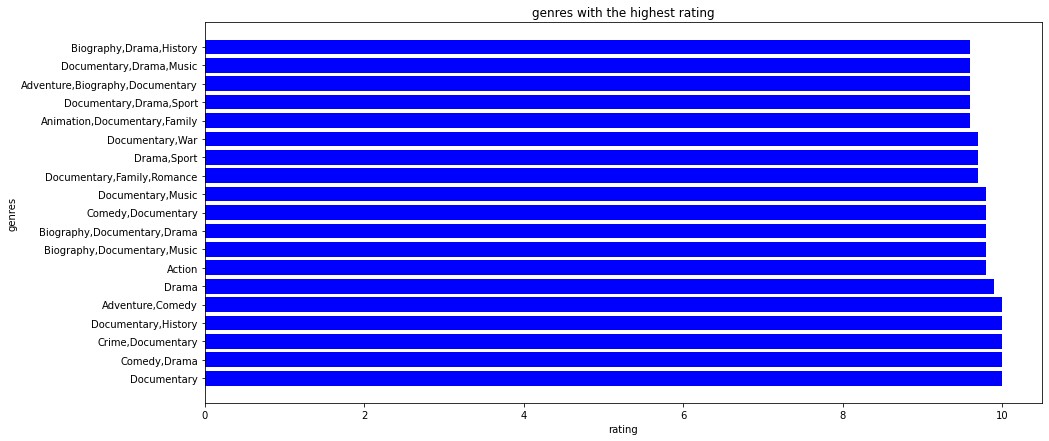

In [155]:
plt.figure(figsize = (15,7))
best_genres = basics.nlargest(50,"averagerating")
plt.barh(best_genres["genres"],best_genres["averagerating"], color = "blue", orientation="horizontal")
plt.title("genres with the highest rating")
plt.xlabel("rating")
plt.ylabel("genres")

plt.show()

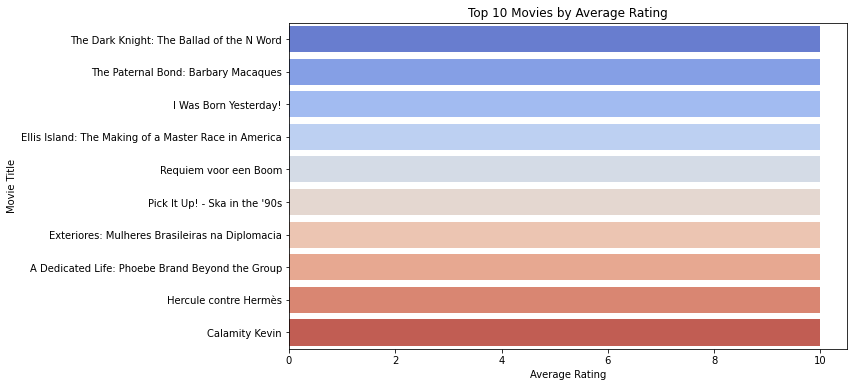

In [165]:
top_movies = basics.sort_values(by=['averagerating'], ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_movies, y='primary_title', x='averagerating', palette='coolwarm')
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

The graph above us here shows us the top 50 genres with the highest rating being documentaries

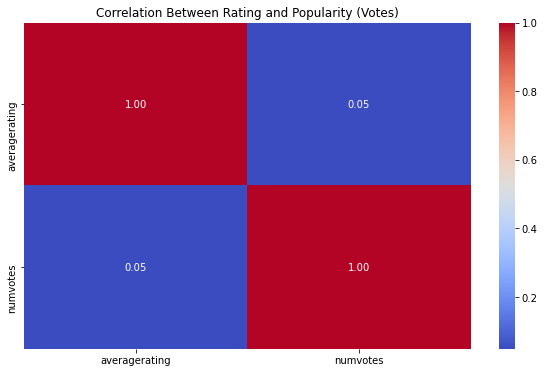

In [166]:
corr = basics[['averagerating', 'numvotes']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Rating and Popularity (Votes)')
plt.show()

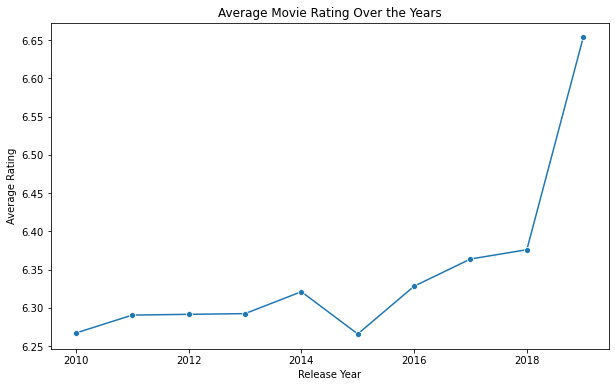

In [167]:
rating_by_year = basics.groupby('start_year')['averagerating'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=rating_by_year, x='start_year', y='averagerating', marker='o')
plt.title('Average Movie Rating Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()


In [156]:
basics.columns

Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [157]:
basics.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
